# 1. t检验

In [1]:
# 导入数据
import pandas as pd
DATA_PATH = "./CCSS_sample.xlsx"
ccss = pd.read_excel(DATA_PATH, sheet_name=0)

## 1.1 单样本t检验

### 1.1.1 单样本t检验 scipy 实现方法

In [2]:
temp_data = ccss.query("s0 == '广州' & time == 200704").index1
temp_data.describe()

count    100.000000
mean      97.164727
std       20.808324
min       31.242677
25%       85.917363
50%      101.538702
75%      109.349371
max      140.592049
Name: index1, dtype: float64

In [3]:
from scipy import stats as ss
ss.ttest_1samp(temp_data,100)

Ttest_1sampResult(statistic=-1.3625667518512996, pvalue=0.17611075148299993)

### 1.1.2 单样本t检验statsmodels 实现方法

In [4]:
from statsmodels.stats import weightstats as ws
des = ws.DescrStatsW(temp_data)

In [5]:
des.mean

97.16472701710536

In [6]:
# 计算95%可信区间
des.tconfint_mean()

(93.03590418536487, 101.29354984884586)

In [7]:
# 单样本t检验
des.ttest_mean(100)

(-1.3625667518512996, 0.17611075148299993, 99.0)

In [8]:
# 单侧单样本t检验
des.ttest_mean(value=100, alternative="smaller")

(-1.3625667518512996, 0.08805537574149996, 99.0)

In [9]:
des.ttest_mean(value=100, alternative="larger")

(-1.3625667518512996, 0.9119446242585001, 99.0)

## 1.2 两样本t检验

### 1.2.1 scipy

In [10]:
ccss.groupby("s7").index1.describe()

,count,mean,std,min,25%,50%,75%,max
s7,,,,,,,,
已婚,790.0,95.033106,21.282487,0.000000,85.917363,93.728032,109.349371,156.213387
未婚,343.0,98.282359,19.959824,23.432008,85.917363,101.538702,109.349371,156.213387
离异/分居/丧偶,14.0,85.917363,24.316544,31.242677,72.248692,85.917363,101.538702,124.970710


<AxesSubplot:>

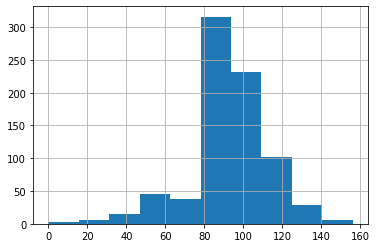

In [11]:
s1 = ccss.index1[ccss.s7 == "已婚"]
s2 = ccss.index1[ccss.s7 == "未婚"]
s1.hist()

<AxesSubplot:>

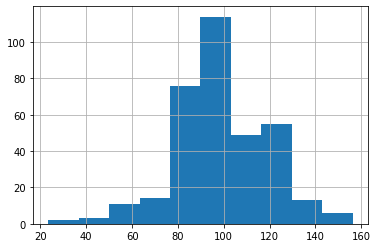

In [12]:
s2.hist()

In [13]:
# 方差齐性检验
ss.levene(s1,s2) # H0 两样本方差一样

LeveneResult(statistic=0.6178737960192996, pvalue=0.43200314605212653)

In [14]:
ss.ttest_ind(s1,s2)

Ttest_indResult(statistic=-2.405261376009453, pvalue=0.016320721789339597)

In [15]:
ss.ttest_ind(s1,s2,equal_var=False) # 两样本方差不齐时，使用矫正t检验

Ttest_indResult(statistic=-2.4669071564965845, pvalue=0.013870360692360313)

### 1.2.2 statsmodels

In [16]:
d1 = ws.DescrStatsW(s1)
d2 = ws.DescrStatsW(s2)

In [17]:
comp = ws.CompareMeans(d1,d2)

In [18]:
comp.ttest_ind()

(-2.4052613760094634, 0.01632072178933914, 1131.0)

In [19]:
comp.tconfint_diff()  # 计算两样本均值差异的可信区间

(-5.899791658291523, -0.5987129330356953)

In [20]:
comp.ttest_ind(usevar= "unequal") # 方差不齐

(-2.4669071564965956, 0.013870360692359867, 690.0875759383671)

## 1.3 配对t检验

### 1.3.1 基本使用场景

    1.同一个受试对象处理前后的比较，但其中掺杂了时间变量的影响。
    2.将受试对象根据情况相似者进行配对（或自身进行配对），分别予以几种处理

In [21]:
ccss_p = pd.read_excel(DATA_PATH,sheet_name=1)
ccss_p.head()

,time,id,s2,s3,Qa3,Qa4,Qa8,Qa10,Qa16,index1,index1a,index1b,Qa3n,Qa4n,Qa8n,Qa10n,Qa16n,index1n,index1an,index1bn
0,200704,22,2,59,100,100,100,100,50,70.296024,66.026939,72.642743,50,100,100,100,100,70.296024,66.026939,72.642743
1,200704,40,2,28,150,150,150,150,100,109.349371,110.044898,108.964114,150,100,100,200,100,101.538702,110.044898,96.856991
2,200704,45,1,55,100,50,50,100,200,78.106694,132.053878,48.428495,150,100,150,150,100,101.538702,110.044898,96.856991
3,200704,69,1,26,150,200,150,50,100,101.538702,110.044898,96.856991,150,100,150,200,200,124.970710,154.062858,108.964114
4,200704,98,1,63,100,200,150,150,100,109.349371,88.035919,121.071238,150,150,100,0,100,78.106694,110.044898,60.535619


In [22]:
ccss_p.loc[:,["index1","index1n"]].describe()

,index1,index1n
count,88.000000,88.000000
mean,98.787216,96.035730
std,16.152752,20.102950
min,70.296024,39.053347
25%,85.917363,85.917363
50%,101.538702,93.728032
75%,109.349371,109.349371
max,132.781379,132.781379


In [23]:
# 检验两个变量是否相关
ss.pearsonr(ccss_p.index1,ccss_p.index1n) # H0 无效假设，即两样本变量不相关

(0.2638011798615908, 0.01301162367951006)

In [24]:
# 配对t检验
ss.ttest_rel(ccss_p.index1,ccss_p.index1n) # H0 两变量的均值差值为0

Ttest_relResult(statistic=1.1616334792419984, pvalue=0.24856144386191056)

## 1.4 作业

    1.4.1 北京、上海两地在2007年4月时的信心值是否有偏离基准值100

In [25]:
# 北京
ccss.head()

,time,id,s0,s2,s3,s4,s5,s7,s9,c0_1,...,Qs9,Qa3,Qa4,Qa8,Qa9,Qa10,Qa16,index1,index1a,index1b
0,200704,1,北京,男,20,本科,公司普通职员（白领）,未婚,2000-2999元,0,...,2500.0,100,200,200,200,100,100,109.349371,88.035919,121.071238
1,200704,2,北京,男,24,高中/中专,公司普通职员（白领）,未婚,6000-7999元,0,...,7000.0,100,100,100,150,200,100,93.728032,88.035919,96.856991
2,200704,3,上海,男,20,高中/中专,无业/待业/失业/家庭主妇,未婚,1000-1499元,0,...,1250.0,100,150,150,100,100,100,93.728032,88.035919,96.856991
3,200704,4,北京,女,65,大专,企/事业管理人员,已婚,1000-1499元,0,...,1250.0,150,150,100,100,100,200,109.349371,154.062858,84.749867
4,200704,5,上海,女,40,高中/中专,公司普通职员（白领）,已婚,99拒绝回答,0,...,NaN,100,100,100,100,150,100,85.917363,88.035919,84.749867


In [27]:
data_beijing = ccss.query("s0 == '北京' & time == 200704").index1
ss.ttest_1samp(data_beijing,popmean=100)

Ttest_1sampResult(statistic=0.03174439870144079, pvalue=0.9747397985209061)

In [28]:
bj_t = ws.DescrStatsW(data_beijing)
bj_t.tconfint_mean()

(96.63717608856064, 103.47217328268044)

In [33]:
bj_t.ttest_mean(100)

(0.03174439870144079, 0.9747397985209061, 99.0)

In [30]:
data_beijing.describe()

count    100.000000
mean     100.054675
std       17.223412
min       54.674686
25%       85.917363
50%      101.538702
75%      109.349371
max      140.592049
Name: index1, dtype: float64